## Rock type characterization
#### About the dataset: the core_analysis.csv file contains 240 core samples analysis with porosity and permeability values. By analyzing this data we can find the rock type characterization to identify the reservoir quality rock of a reservoir.


## Importing python library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Dataset: exploring and analysis

In [2]:
url='https://raw.githubusercontent.com/perezjgg/PuKnow/main/dataset/core_analysis.csv'


In [3]:
df = pd.read_csv(url, error_bad_lines=False)

In [4]:
df.head()

,id,core_sample,true_rt,poro,k
0,1,rock-132-27,0,16.606437,696.971278
1,2,rock-132-67,0,17.877034,5311.468120
2,3,rock-132-80,0,15.805681,2120.361599
3,4,rock-133-151,0,15.000000,1160.000000
4,5,rock-133-4,0,15.500000,707.000000


In [5]:
df.shape

(240, 5)

In [6]:
df.describe()

,id,true_rt,poro,k
count,240.00000,240.000000,240.000000,240.000000
mean,120.50000,1.304167,12.625422,397.023163
std,69.42622,0.907421,2.906988,686.868096
min,1.00000,0.000000,5.200000,0.509646
25%,60.75000,1.000000,10.400000,25.075000
50%,120.50000,1.000000,12.600000,136.000000
75%,180.25000,2.000000,14.500000,416.750000
max,240.00000,3.000000,21.120000,5311.468120


No handles with labels found to put in legend.


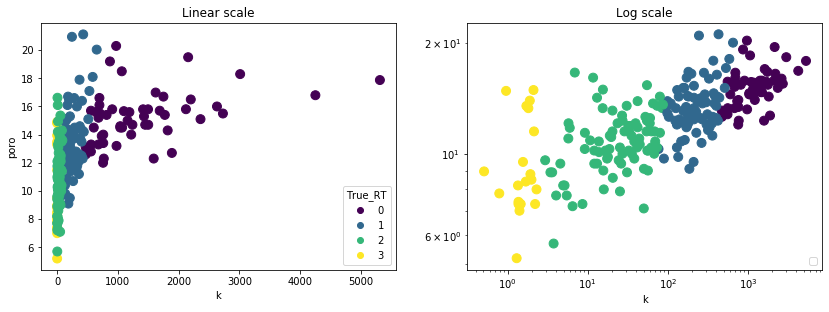

In [7]:
fig = plt.figure(figsize=(14, 10)) # create figure

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (1 row, 1 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

classes=[0,1,2,3]
a=ax0.scatter(df['k'], df['poro'], s=80, c=df['true_rt'], alpha=1)
ax0.legend(handles=a.legend_elements()[0], labels=classes, title="True_RT")
ax0.set_xlabel("k")
ax0.set_ylabel("poro")
ax0.set_title("Linear scale")

classes=[0,1,2,3]
b=ax1.scatter(df['k'], df['poro'], s=80, c=df['true_rt'], alpha=1)
ax1.legend(handles=a.legend_elements()[0], labels=classes, title="True_RT")
ax1.set_xlabel("k")
ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.set_title("Log scale")

plt.legend(loc='lower right');

In [8]:
# Transforming data into logarithmic values to better analysis of the data
# New dataset
df_log=df.get(['k', 'poro',])
df_log["logk"]=np.log(df.k)
df_log["logporo"]=np.log(df.poro)
df_log=df_log.get(['logk', 'logporo'])
df_log

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,logk,logporo
0,6.546744,2.809790
1,8.577624,2.883517
2,7.659342,2.760369
3,7.056175,2.708050
4,6.561031,2.740840
...,...,...
235,3.292126,2.541602
236,2.624669,2.379546
237,2.459589,2.778819
238,1.081805,2.261763


## K-means Clustering: unpreprocesing data

In [9]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [10]:
k_means.fit(df_log)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
k_means_labels = k_means.labels_
k_means_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 3])

In [12]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[5.32975532, 2.58071608],
       [0.92029784, 2.21092354],
       [7.03135753, 2.73059077],
       [3.40199009, 2.39216674]])

No handles with labels found to put in legend.


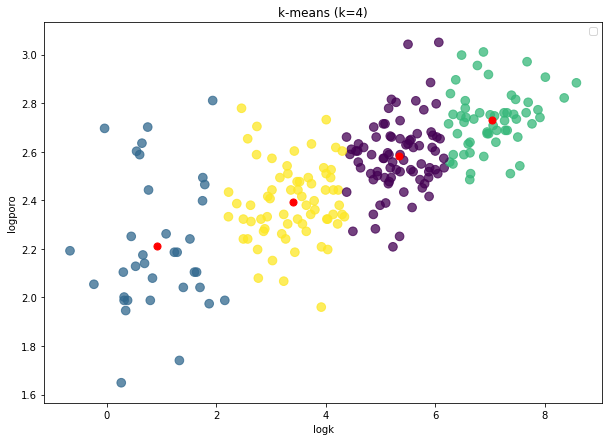

In [13]:
plt.figure(figsize=(10, 7))  
plt.scatter(df_log['logk'], df_log['logporo'], c= k_means_labels.astype(float), s=75, alpha=0.75)
plt.scatter(k_means_cluster_centers[:, 0], k_means_cluster_centers[:, 1], c='red',s=50)
plt.xlabel('logk'); plt.ylabel('logporo')
plt.title('k-means (k=4)')
plt.legend()
plt.show()

In [14]:
df_log.insert(2,"RT",k_means_labels,True)
df_log.head(10)

,logk,logporo,RT
0,6.546744,2.809790,2
1,8.577624,2.883517,2
2,7.659342,2.760369,2
3,7.056175,2.708050,2
4,6.561031,2.740840,2
5,6.810142,2.760010,2
6,7.543803,2.541602,2
7,6.403574,2.674149,2
8,5.720312,2.484907,0
9,5.643891,2.809403,0


In [15]:
df.insert(3,"RT",k_means_labels,True)
df.head(10)

,id,core_sample,true_rt,RT,poro,k
0,1,rock-132-27,0,2,16.606437,696.971278
1,2,rock-132-67,0,2,17.877034,5311.468120
2,3,rock-132-80,0,2,15.805681,2120.361599
3,4,rock-133-151,0,2,15.000000,1160.000000
4,5,rock-133-4,0,2,15.500000,707.000000
5,6,rock-134-30,0,2,15.800000,907.000000
6,7,rock-134-51,0,2,12.700000,1889.000000
7,8,rock-134-95,0,2,14.500000,604.000000
8,9,rock-133-75,1,0,12.000000,305.000000
9,10,rock-134-9,1,0,16.600000,282.560000


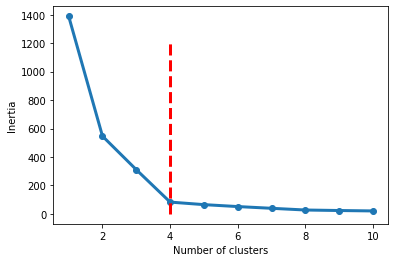

In [16]:
# calculate distortion for a range of number of cluster
inertia_R = []
for i in np.arange(1, 11):
    km = KMeans(
        n_clusters=i
    )
    km.fit(df_log)
    inertia_R.append(km.inertia_)

# plot
plt.plot(np.arange(1, 11), inertia_R, marker='o', lw=3)
plt.plot([4, 4], [0, 1200], 'k--', c='red', lw=3)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

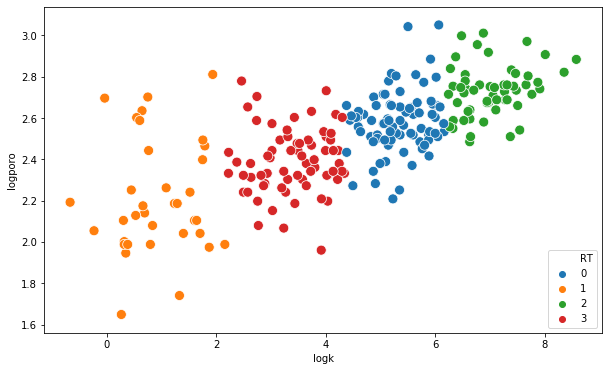

In [17]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x=df_log['logk'], y=df_log['logporo'], hue="RT", 
                data=df, palette="tab10", s=100);
plt.legend(loc='lower right');

## K-means Clustering: StandardScaler

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_log)
df_rt1=scaler.transform(df_log)
print(scaler.mean_)
print(df_rt1)

[4.5304598  2.50771197 1.45416667]
[[ 0.98027158  1.24877682  0.44598345]
 [ 1.96763889  1.55355847  0.44598345]
 [ 1.52119126  1.04447321  0.44598345]
 [ 1.22794537  0.82818813  0.44598345]
 [ 0.98721733  0.9637396   0.44598345]
 [ 1.10832981  1.04298706  0.44598345]
 [ 1.46501881  0.14009964  0.44598345]
 [ 0.91066558  0.68804082  0.44598345]
 [ 0.57847895 -0.09427604 -1.18815439]
 [ 0.54132486  1.24717422 -1.18815439]
 [ 0.31422793  0.64697994 -1.18815439]
 [ 0.07822012  0.45342755 -1.18815439]
 [ 0.25251861  0.2682944  -1.18815439]
 [ 0.40164389  0.91005119 -1.18815439]
 [-0.04378605  0.3357584  -1.18815439]
 [-0.13917284 -0.52983109  1.26305237]
 [-0.38543654 -0.16375582  1.26305237]
 [-0.50563953 -0.27021534  1.26305237]
 [-1.04880547 -0.50229593  1.26305237]
 [-1.60336368 -1.32972906 -0.37108547]
 [-1.89127469  0.52654218 -0.37108547]
 [-2.53030854 -1.30508272 -0.37108547]
 [-1.86805103 -1.5198292  -0.37108547]
 [-1.9864103  -1.06002804 -0.37108547]
 [-1.94749536 -1.56875225 -0.

[[-1.76965909 -1.29982191 -0.37108547]
 [ 1.21587955  0.92136968  0.44598345]
 [ 0.36870242  0.31324537 -1.17831018]
 [-0.54863628 -0.47765813  1.26305237]]


Text(0.5, 1.0, 'k-means (k=4)')

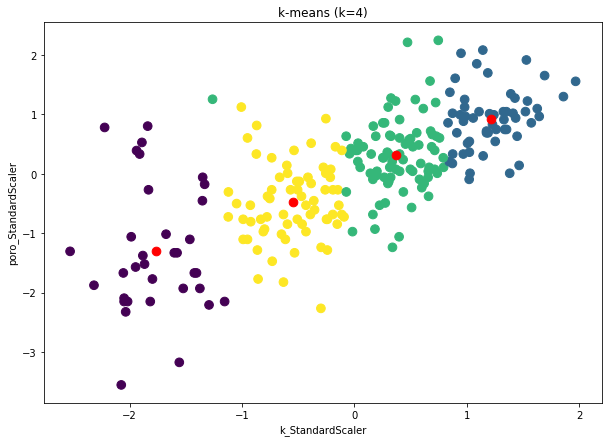

In [19]:
kmeans = KMeans(n_clusters=4,n_init = 12).fit(df_rt1)
centroids = kmeans.cluster_centers_
print(centroids)
plt.figure(figsize=(10, 7))  
plt.scatter(df_rt1[:, 0], df_rt1[:, 1], c= kmeans.labels_.astype(float), s=75, alpha=1)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=75)
plt.xlabel('k_StandardScaler'); plt.ylabel('poro_StandardScaler')
plt.title('k-means (k=4)')

In [20]:
kmeans.labels_1=kmeans.labels_
kmeans.labels_1

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 2, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 3])

In [21]:
df.insert(4,"RT1",kmeans.labels_1,True)
df.head(5)

,id,core_sample,true_rt,RT,RT1,poro,k
0,1,rock-132-27,0,2,1,16.606437,696.971278
1,2,rock-132-67,0,2,1,17.877034,5311.468120
2,3,rock-132-80,0,2,1,15.805681,2120.361599
3,4,rock-133-151,0,2,1,15.000000,1160.000000
4,5,rock-133-4,0,2,1,15.500000,707.000000


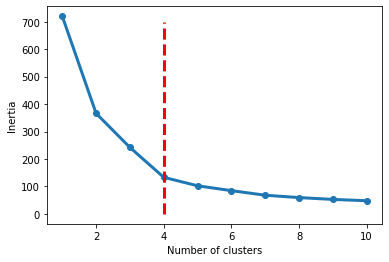

In [22]:
# calculate distortion for a range of number of cluster
inertia_RT1 = []
for i in np.arange(1, 11):
    km = KMeans(
        n_clusters=i
    )
    km.fit(df_rt1)
    inertia_RT1.append(km.inertia_)

# plot
plt.figure()
plt.plot(np.arange(1, 11), inertia_RT1, marker='o', lw=3)
plt.plot([4, 4], [0, 700], 'k--', c='red', lw=3)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

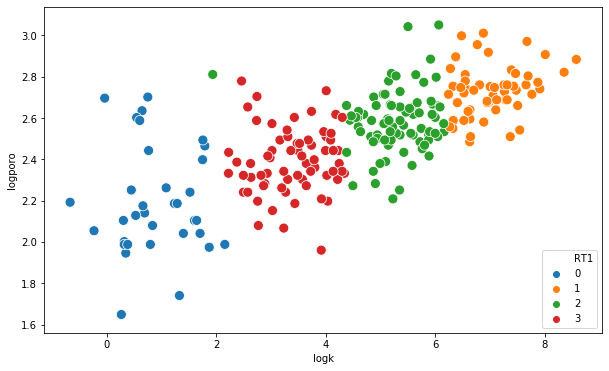

In [23]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x=df_log['logk'], y=df_log['logporo'], hue="RT1", 
                data=df, palette="tab10", s=100);
plt.legend(loc='lower right');

## K-means Clustering: MinMaxScaler

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()

In [26]:
df_rt2 = scaler.fit_transform(df_log)

In [27]:
print(df_rt2)

[[0.78048491 0.82845559 0.66666667]
 [1.         0.8810587  0.66666667]
 [0.90074414 0.79319427 0.66666667]
 [0.83554865 0.75586503 0.66666667]
 [0.78202912 0.77926023 0.66666667]
 [0.80895529 0.79293777 0.66666667]
 [0.88825568 0.63710594 0.66666667]
 [0.76500986 0.73167662 0.66666667]
 [0.69115692 0.59665439 0.        ]
 [0.68289669 0.82817899 0.        ]
 [0.63240767 0.72458981 0.        ]
 [0.57993756 0.69118407 0.        ]
 [0.61868823 0.65923143 0.        ]
 [0.65184231 0.769994   0.        ]
 [0.55281271 0.67087522 0.        ]
 [0.53160597 0.52148074 1.        ]
 [0.47685573 0.58466269 1.        ]
 [0.45013176 0.56628854 1.        ]
 [0.32937314 0.52623311 1.        ]
 [0.20608174 0.38342415 0.33333333]
 [0.14207232 0.70380312 0.33333333]
 [0.         0.38767793 0.33333333]
 [0.14723549 0.35061424 0.33333333]
 [0.12092143 0.42997259 0.33333333]
 [0.12957314 0.34217048 0.33333333]
 [0.1068834  0.25173443 0.33333333]
 [0.10999408 0.21208591 0.33333333]
 [0.15856944 0.24202694 0.33

[[ 6.48942183e-01  6.65013437e-01 -5.55111512e-17]
 [ 4.40572569e-01  5.30485420e-01  1.00000000e+00]
 [ 8.32866134e-01  7.71947490e-01  6.66666667e-01]
 [ 1.72329709e-01  4.01170254e-01  3.33333333e-01]]


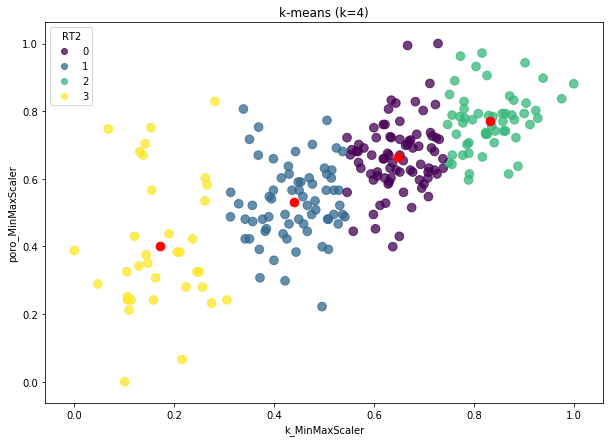

In [28]:
kmeans = KMeans(n_clusters=4,n_init = 12).fit(df_rt2)
centroids = kmeans.cluster_centers_
print(centroids)
plt.figure(figsize=(10, 7)) 
c=["0","1","2","3"]
x=plt.scatter(df_rt2[:, 0], df_rt2[:, 1], c= kmeans.labels_.astype(float), s=75, alpha=0.75)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=75)
plt.xlabel('k_MinMaxScaler'); plt.ylabel('poro_MinMaxScaler')
plt.title('k-means (k=4)')
plt.legend(handles=x.legend_elements()[0], labels=c, title="RT2")


In [29]:
kmeans.labels_2=kmeans.labels_
kmeans.labels_2

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 3, 1])

In [30]:
df.insert(5,"RT2",kmeans.labels_2,True)
df.head(5)

,id,core_sample,true_rt,RT,RT1,RT2,poro,k
0,1,rock-132-27,0,2,1,2,16.606437,696.971278
1,2,rock-132-67,0,2,1,2,17.877034,5311.468120
2,3,rock-132-80,0,2,1,2,15.805681,2120.361599
3,4,rock-133-151,0,2,1,2,15.000000,1160.000000
4,5,rock-133-4,0,2,1,2,15.500000,707.000000


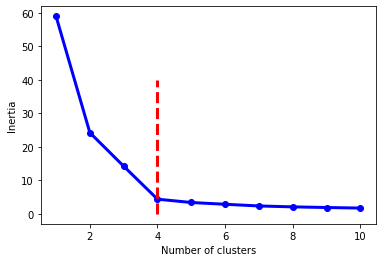

In [31]:
# calculate distortion for a range of number of cluster
inertia_RT2 = []
for i in np.arange(1, 11):
    km = KMeans(
        n_clusters=i
    )
    km.fit(df_rt2)
    inertia_RT2.append(km.inertia_)

# plot
plt.plot(np.arange(1, 11), inertia_RT2, marker='o', color="b", lw=3)
plt.plot([4, 4], [0, 40], 'k--', c='red', lw=3)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [32]:
df

,id,core_sample,true_rt,RT,RT1,RT2,poro,k
0,1,rock-132-27,0,2,1,2,16.606437,696.971278
1,2,rock-132-67,0,2,1,2,17.877034,5311.468120
2,3,rock-132-80,0,2,1,2,15.805681,2120.361599
3,4,rock-133-151,0,2,1,2,15.000000,1160.000000
4,5,rock-133-4,0,2,1,2,15.500000,707.000000
...,...,...,...,...,...,...,...,...
235,236,rock-70-104,2,3,3,1,12.700000,26.900000
236,237,rock-70-114,2,3,3,1,10.800000,13.800000
237,238,rock-70-321,2,3,3,1,16.100000,11.700000
238,239,rock-70-415,2,1,0,3,9.600000,2.950000


In [33]:
df["logk"]=np.log(df.k)
df["logporo"]=np.log(df.poro)
df

,id,core_sample,true_rt,RT,RT1,RT2,poro,k,logk,logporo
0,1,rock-132-27,0,2,1,2,16.606437,696.971278,6.546744,2.809790
1,2,rock-132-67,0,2,1,2,17.877034,5311.468120,8.577624,2.883517
2,3,rock-132-80,0,2,1,2,15.805681,2120.361599,7.659342,2.760369
3,4,rock-133-151,0,2,1,2,15.000000,1160.000000,7.056175,2.708050
4,5,rock-133-4,0,2,1,2,15.500000,707.000000,6.561031,2.740840
...,...,...,...,...,...,...,...,...,...,...
235,236,rock-70-104,2,3,3,1,12.700000,26.900000,3.292126,2.541602
236,237,rock-70-114,2,3,3,1,10.800000,13.800000,2.624669,2.379546
237,238,rock-70-321,2,3,3,1,16.100000,11.700000,2.459589,2.778819
238,239,rock-70-415,2,1,0,3,9.600000,2.950000,1.081805,2.261763


Text(0, 0.5, 'logporo')

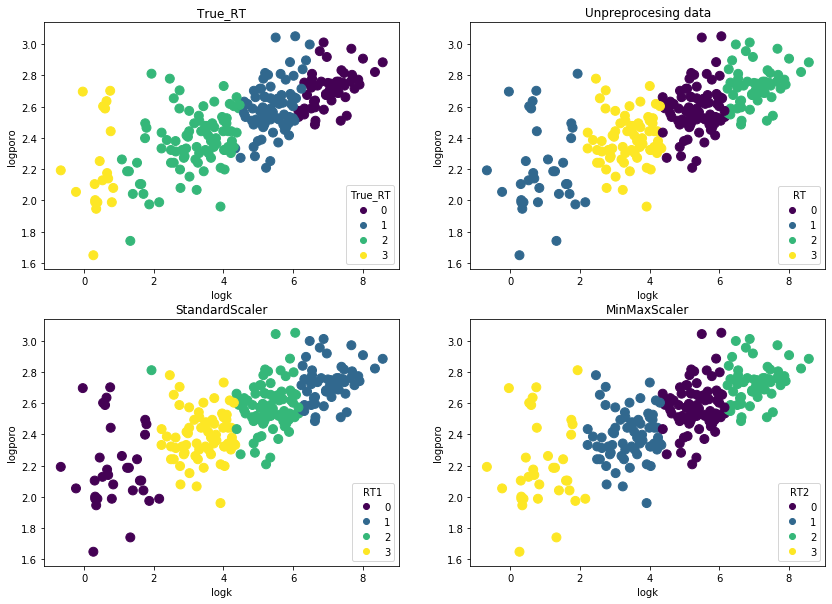

In [34]:
## Viewing before label arrangement
## fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)
fig, axs = plt.subplots(2, 2,figsize=(14, 10))

classes = ['0', '1', '2','3']
h=axs[0, 0].scatter(df['logk'], df['logporo'], s=80, c=df['true_rt'], alpha=1)
axs[0, 0].set_title("True_RT")
axs[0, 0].legend(handles=h.legend_elements()[0], labels=classes, title="True_RT")
axs[0, 0].set_xlabel("logk")
axs[0, 0].set_ylabel("logporo")

classes_rt = ['0', '1', '2','3']
j=axs[0, 1].scatter(df['logk'], df['logporo'], s=80, c=df['RT'], alpha=1)
axs[0, 1].set_title("Unpreprocesing data")
axs[0, 1].legend(handles=j.legend_elements()[0], labels=classes_rt, title="RT")
axs[0, 1].set_xlabel("logk")
axs[0, 1].set_ylabel("logporo")

classes_rt1 = ['0', '1', '2','3']
k=axs[1, 0].scatter(df['logk'], df['logporo'], s=80, c=df['RT1'], alpha=1)
axs[1, 0].set_title("StandardScaler")
axs[1, 0].legend(handles=k.legend_elements()[0], labels=classes_rt1, title="RT1")
axs[1, 0].set_xlabel("logk")
axs[1, 0].set_ylabel("logporo")

classes_rt2 = ['0', '1', '2','3']
l=axs[1, 1].scatter(df['logk'], df['logporo'], s=80, c=df['RT2'], alpha=1)
axs[1, 1].set_title("MinMaxScaler")
axs[1, 1].legend(handles=l.legend_elements()[0], labels=classes_rt2, title="RT2")
axs[1, 1].set_xlabel("logk")
axs[1, 1].set_ylabel("logporo")

In [35]:
df_new=df
df_new

,id,core_sample,true_rt,RT,RT1,RT2,poro,k,logk,logporo
0,1,rock-132-27,0,2,1,2,16.606437,696.971278,6.546744,2.809790
1,2,rock-132-67,0,2,1,2,17.877034,5311.468120,8.577624,2.883517
2,3,rock-132-80,0,2,1,2,15.805681,2120.361599,7.659342,2.760369
3,4,rock-133-151,0,2,1,2,15.000000,1160.000000,7.056175,2.708050
4,5,rock-133-4,0,2,1,2,15.500000,707.000000,6.561031,2.740840
...,...,...,...,...,...,...,...,...,...,...
235,236,rock-70-104,2,3,3,1,12.700000,26.900000,3.292126,2.541602
236,237,rock-70-114,2,3,3,1,10.800000,13.800000,2.624669,2.379546
237,238,rock-70-321,2,3,3,1,16.100000,11.700000,2.459589,2.778819
238,239,rock-70-415,2,1,0,3,9.600000,2.950000,1.081805,2.261763


In [36]:
print(df_new.groupby(['true_rt']).mean())
print(df_new.groupby(['true_rt']).count())

                 id        RT       RT1       RT2       poro            k  \
true_rt                                                                     
0         54.169811  1.924528  1.037736  1.924528  15.199041  1367.889489   
1        114.740741  0.135802  1.962963  0.111111  13.549095   247.110768   
2        187.732558  2.511628  2.453488  1.302326  10.877532    31.855354   
3         30.500000  1.000000  0.000000  3.000000   9.580384     1.594171   

             logk   logporo  
true_rt                      
0        7.050349  2.713988  
1        5.392230  2.592581  
2        3.124194  2.368165  
3        0.409527  2.217410  
         id  core_sample  RT  RT1  RT2  poro   k  logk  logporo
true_rt                                                        
0        53           53  53   53   53    53  53    53       53
1        81           81  81   81   81    81  81    81       81
2        86           86  86   86   86    86  86    86       86
3        20           20  20   20   2

In [37]:
df_new1=df_new.replace({'RT': {2: 4, 0: 5, 3: 6, 1: 7}})

In [38]:
df_new1=df_new1.replace({'RT1': {1: 4, 2: 5, 3: 6, 0: 7}})

In [39]:
df_new1=df_new1.replace({'RT2': {2: 4, 0: 5, 1: 6, 3: 7}})

In [40]:
df_new1.tail()

,id,core_sample,true_rt,RT,RT1,RT2,poro,k,logk,logporo
235,236,rock-70-104,2,6,6,6,12.7,26.90,3.292126,2.541602
236,237,rock-70-114,2,6,6,6,10.8,13.80,2.624669,2.379546
237,238,rock-70-321,2,6,6,6,16.1,11.70,2.459589,2.778819
238,239,rock-70-415,2,7,7,7,9.6,2.95,1.081805,2.261763
239,240,rock-70-452,2,6,6,6,11.4,9.24,2.223542,2.433613


In [41]:
df_new1=df_new1.replace({'RT': {4: 0, 5: 1, 6: 2, 7: 3}})

In [42]:
df_new1=df_new1.replace({'RT1': {4: 0, 5: 1, 6: 2, 7: 3}})

In [43]:
df_new1=df_new1.replace({'RT2': {4: 0, 5: 1, 6: 2, 7: 3}})

In [44]:
print(df_new1.groupby(['true_rt']).mean())
print(df_new1.groupby(['true_rt']).count())

                 id        RT       RT1       RT2       poro            k  \
true_rt                                                                     
0         54.169811  0.037736  0.037736  0.037736  15.199041  1367.889489   
1        114.740741  0.962963  0.962963  0.962963  13.549095   247.110768   
2        187.732558  2.127907  2.104651  2.127907  10.877532    31.855354   
3         30.500000  3.000000  3.000000  3.000000   9.580384     1.594171   

             logk   logporo  
true_rt                      
0        7.050349  2.713988  
1        5.392230  2.592581  
2        3.124194  2.368165  
3        0.409527  2.217410  
         id  core_sample  RT  RT1  RT2  poro   k  logk  logporo
true_rt                                                        
0        53           53  53   53   53    53  53    53       53
1        81           81  81   81   81    81  81    81       81
2        86           86  86   86   86    86  86    86       86
3        20           20  20   20   2

In [45]:
#print(df_new1.groupby(['true_rt']).mean())
print(df_new1.groupby(['true_rt'])["RT"].mean())


true_rt
0    0.037736
1    0.962963
2    2.127907
3    3.000000
Name: RT, dtype: float64


In [46]:
print(df_new1["RT"][df.true_rt==0].mean(), 
      df_new1["RT"][df.true_rt==1].mean(),
      df_new1["RT"][df.true_rt==2].mean(),
      df_new1["RT"][df.true_rt==3].mean())

0.03773584905660377 0.9629629629629629 2.127906976744186 3.0


Text(0, 0.5, 'logporo')

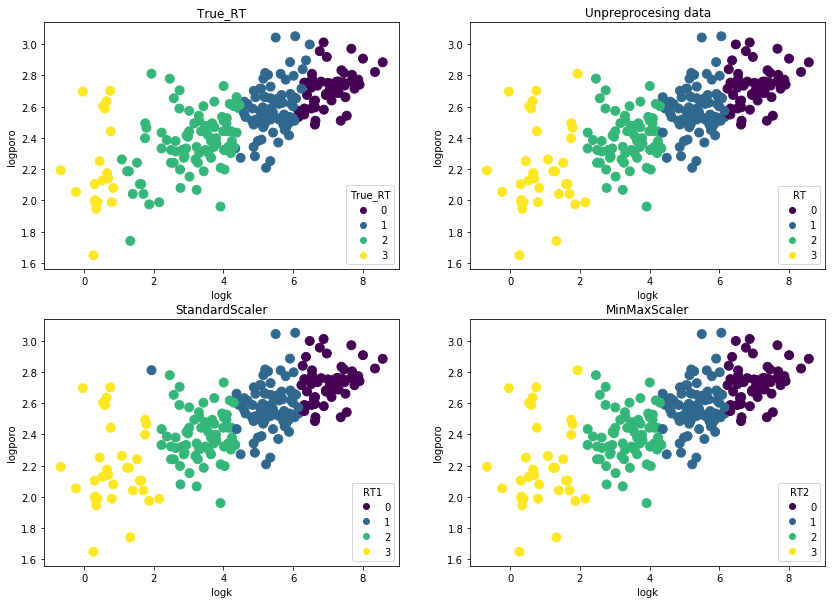

In [47]:
## Viewing after label arrangement

## fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)
fig, axs = plt.subplots(2, 2,figsize=(14, 10))

classes = ['0', '1', '2','3']
h=axs[0, 0].scatter(df_new1['logk'], df_new1['logporo'], s=80, c=df_new1['true_rt'], alpha=1)
axs[0, 0].set_title("True_RT")
axs[0, 0].legend(handles=h.legend_elements()[0], labels=classes, title="True_RT")
axs[0, 0].set_xlabel("logk")
axs[0, 0].set_ylabel("logporo")

classes_rt = ['0', '1', '2','3']
j=axs[0, 1].scatter(df_new1['logk'], df_new1['logporo'], s=80, c=df_new1['RT'], alpha=1)
axs[0, 1].set_title("Unpreprocesing data")
axs[0, 1].legend(handles=j.legend_elements()[0], labels=classes_rt, title="RT")
axs[0, 1].set_xlabel("logk")
axs[0, 1].set_ylabel("logporo")

classes_rt1 = ['0', '1', '2','3']
k=axs[1, 0].scatter(df_new1['logk'], df_new1['logporo'], s=80, c=df_new1['RT1'], alpha=1)
axs[1, 0].set_title("StandardScaler")
axs[1, 0].legend(handles=k.legend_elements()[0], labels=classes_rt1, title="RT1")
axs[1, 0].set_xlabel("logk")
axs[1, 0].set_ylabel("logporo")

classes_rt2 = ['0', '1', '2','3']
l=axs[1, 1].scatter(df_new1['logk'], df_new1['logporo'], s=80, c=df_new1['RT2'], alpha=1)
axs[1, 1].set_title("MinMaxScaler")
axs[1, 1].legend(handles=l.legend_elements()[0], labels=classes_rt2, title="RT2")
axs[1, 1].set_xlabel("logk")
axs[1, 1].set_ylabel("logporo")

### Report

| TrueRT 	| RT 	| RT1 	| RT2 	|
|:---:	|:---:	|:---:	|:---:	|
| 0 	|  0.037736 	|  0.037736 	|  0.037736 	|	
| 1 	|  0.962963 	|  0.962963 	|  0.962963 	|
| 2 	|  2.127907 	|  2.104651	|  2.127907 	|
| 3    	|   3  	|   3  	|   3  	|


#### 1) The RT by predicted by k-means cluster it's close of the True_RT, that's means that de k-means clustering analysis works for a quick characterization of rock quality from core analysis samples.

#### 2) The elbows graphs shown that the ideal cluster numbers is 4.

#### 3) Preprocessing data it doesn't a relevant impact at the final results. At this case, it's not  a rule.